# Project 1: Titanic. Due Monday, August 19 at 11:59pm

In [97]:
# Don't change this cell
from datascience import *

import matplotlib.pyplot as plots
%matplotlib inline
plots.style.use('fivethirtyeight')

import numpy as np

from client.api.notebook import Notebook
ok = Notebook('project01_sol.ok')
#_ = ok.auth(inline=True)

Assignment: Project 1: Titanic
OK, version v1.13.11



## Announcements

This assignment is due **Monday, Aug 19 at 11:59pm**. You can use a slip day to extend the deadline by 24 hours.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

The project is more challenging than the homeworks. You are encouraged to find a partner and use pair programming.

Definitely start early so that you have time to get help if you're stuck. A calendar with lab hour times and locations appears on [https://sites.google.com/ucsd.edu/dsc10summer2019/staff-hours?authuser=0](https://sites.google.com/ucsd.edu/dsc10summer2019/staff-hours?authuser=0).

## About the Titanic

"RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of modern history's deadliest commercial marine disasters during peacetime. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line." (https://en.wikipedia.org/wiki/RMS_Titanic)

![title](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

## Part 1: Understand and Modify Titanic Data

In this section, you will attempt to understand the landscape of the Titanic dataset. You will explore the meaning and makeup of the columns by answering some questions about the dataset.

**The Data**

This dataset has been modified from [Kaggle](https://www.kaggle.com/c/titanic) and includes the following information on Titanic passengers:

1. `Survived`: 1 indicates that the passenger survived. 0 indicates that the passenger did not survive.
2. `Pclass`: Passenger class status: 1 for upper class, 2 for middle class, 3 for lower class.
3. `Name`: Passenger's name.
4. `Sex`: Passenger's gender.
5. `Age`: Passenger's age
6. `Siblings/Spouses Aboard`: Total number of siblings and spouses aboard. Included are brothers, sisters, stepbrothers, stepsisters, husbands, and wives.
7. `Parents/Children Aboard`: Total number of parents and children aboard. Included are mothers, fathers, daughters, sons, stepdaughters, stepsons.
8. `Fare`: The fare (price) of the ticket, in British pounds.
9. `First Name`: Passenger's first name.

First, load the Titanic dataset into a table.
You should load the file using the path `data/titanic.csv` into a Table called `titanic`.

In [98]:
titanic = ...
titanic

Ellipsis

In [99]:
titanic = Table.read_table('data/titanic.csv')
titanic

Survived | Pclass | Name                                   | Sex    | Age  | Siblings/Spouses Aboard | Parents/Children Aboard | Fare           | First Name
0        | 2      | Mr. William John Berriman              | male   | 23   | 0                       | 0                       | 13.0 pounds    | William
1        | 3      | Mrs. (Beila) Moor                      | female | 27   | 0                       | 1                       | 12.475 pounds  | Beila
0        | 3      | Mr. Nestor Cyriel Vande Walle          | male   | 28   | 0                       | 0                       | 9.5 pounds     | Nestor
0        | 3      | Mr. Khalil Saad                        | male   | 25   | 0                       | 0                       | 7.225 pounds   | Khalil
0        | 3      | Miss. Gerda Ulrika Dahlberg            | female | 22   | 0                       | 0                       | 10.5167 pounds | Gerda
0        | 2      | Mr. Percival James R Sharp             | male   | 27   | 0                       | 0                       | 26.0 pounds    | Percival
1        | 3      | Master. Halim Gonios Moubarek          | male   | 4    | 1                       | 1                       | 15.2458 pounds | Halim
0        | 3      | Mr. Anders Johan Andersson             | male   | 39   | 1                       | 5                       | 31.275 pounds  | Anders
0        | 3      | Mr. Frederick Sage                     | male   | 17   | 8                       | 2                       | 69.55 pounds   | Frederick
0        | 3      | Mrs. Frederick (Augusta Tyler) Goodwin | female | 43   | 1                       | 6                       | 46.9 pounds    | Augusta
... (700 rows omitted)

**Question 1.** Just for fun, what are the full names of the youngest and oldest passengers on board? Save your answers as `youngest` and `oldest`, and give the names exactly as they appear in the `Name` column.

In [100]:
youngest = ...
oldest = ...
youngest, oldest

(Ellipsis, Ellipsis)

In [101]:
youngest = titanic.sort("Age").column("Name").item(0)
oldest = titanic.sort("Age",descending=True).column("Name").item(0)
youngest, oldest

('Master. Viljo Hamalainen', 'Mr. Algernon Henry Wilson Barkworth')

In [102]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Every passenger has a title, such as "Miss." or "Mr.", which appears as the first word of the `Name` column. Define a function called `extract_title` that takes a string as an input and returns the first word in the string. Then, use your function to add a column to the `titanic` table called `Title` containing the title of each passenger.

*Hint: Look up the available Python string methods.*

*Note: Please include the period in the titles (i.e. "Miss." not "Miss")*

In [103]:
# Define your function extract_title here

In [104]:
'Title' in titanic.labels

False

In [105]:
def extract_title(s):
    return s.split()[0]

title = titanic.apply(extract_title, 'Name')
title

titanic = titanic.with_column('Title', title)
titanic

Survived | Pclass | Name                                   | Sex    | Age  | Siblings/Spouses Aboard | Parents/Children Aboard | Fare           | First Name | Title
0        | 2      | Mr. William John Berriman              | male   | 23   | 0                       | 0                       | 13.0 pounds    | William    | Mr.
1        | 3      | Mrs. (Beila) Moor                      | female | 27   | 0                       | 1                       | 12.475 pounds  | Beila      | Mrs.
0        | 3      | Mr. Nestor Cyriel Vande Walle          | male   | 28   | 0                       | 0                       | 9.5 pounds     | Nestor     | Mr.
0        | 3      | Mr. Khalil Saad                        | male   | 25   | 0                       | 0                       | 7.225 pounds   | Khalil     | Mr.
0        | 3      | Miss. Gerda Ulrika Dahlberg            | female | 22   | 0                       | 0                       | 10.5167 pounds | Gerda      | Miss.
0        | 2      | Mr. Percival James R Sharp             | male   | 27   | 0                       | 0                       | 26.0 pounds    | Percival   | Mr.
1        | 3      | Master. Halim Gonios Moubarek          | male   | 4    | 1                       | 1                       | 15.2458 pounds | Halim      | Master.
0        | 3      | Mr. Anders Johan Andersson             | male   | 39   | 1                       | 5                       | 31.275 pounds  | Anders     | Mr.
0        | 3      | Mr. Frederick Sage                     | male   | 17   | 8                       | 2                       | 69.55 pounds   | Frederick  | Mr.
0        | 3      | Mrs. Frederick (Augusta Tyler) Goodwin | female | 43   | 1                       | 6                       | 46.9 pounds    | Augusta    | Mrs.
... (700 rows omitted)

In [106]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Make an array called `possible_titles` containing the different titles that were used by passengers on the Titanic. Each different title should appear only once, and titles should be alphabetically ordered.

*Hint: Look up `np.unique`.*

In [107]:
possible_titles = ...
possible_titles

Ellipsis

In [108]:
possible_titles = np.unique(title)
possible_titles

array(['Capt.', 'Col.', 'Don.', 'Dr.', 'Lady.', 'Major.', 'Master.',
       'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.'], 
      dtype='<U7')

In [109]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Sum the cost of the first two tickets in the table, without changing or converting data types at all. You should see that the sum does not make sense. Explain what causes this.

In [110]:
first_two = ...
first_two

Ellipsis

In [111]:
first_two = titanic.column("Fare").item(0)+titanic.column("Fare").item(1)
first_two

'13.0 pounds12.475 pounds'

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

The sum does not make sense because we are doing string concatenation instead of summation of float.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 5.** How much revenue did the Titanic generate in ticket sales? Save your answer as `total_revenue`.

*Hint: Look up the available Python string methods.*

*Hint: Our solution involved defining a function and using ``apply``.*

In [112]:
total_revenue = ...
total_revenue

Ellipsis

In [113]:
def convert_fare(s):
    return float(s.strip(' pounds'))

total_revenue = titanic.apply(convert_fare, 'Fare').sum()
total_revenue.sum()

23498.774400000002

In [114]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** One British pound in 1912 is equivalent to 113.27 pounds today, due to inflation. One British pound today is equivalent to one US dollar and 33 cents. How much revenue did the Titanic make, measured in today's US dollars, and rounded to the nearest cent? Save your answer as `revenue_dollars`.

In [115]:
revenue_dollars = ...
revenue_dollars

Ellipsis

In [116]:
revenue_dollars = round(total_revenue*113.27*1.33, 2)
revenue_dollars

3540069.21

In [117]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Part 2: Passenger Class and Survival Rate

Now that we have a basic understanding of the data, we can investigate more interesting questions. In this section, we will explore the connection between a passenger's class and their chance of surviving.

Here is the definition of **survival rate** (used in this part as well as parts 3 and 4): For any group of people, the survival rate of that group of people is the percentage of people in that group who survived.

**Question 1.** Create an array of size 3 called `class_percent` containing the percentage of passengers in each of the three classes. To do this, define variables
1. `class1`: the percentage of people in class 1
2. `class2`: the percentage of people in class 2
3. `class3`: the percentage of people in class 3  

The array `class_percent` should contain `class1`, `class2`, `class3` in this order.

In [118]:
class1 = ...
class2 = ...
class3 = ...
class_percent = ...
class_percent

Ellipsis

In [119]:
total_number_passengers = titanic.num_rows
class1 = titanic.where("Pclass",are.equal_to(1)).num_rows / total_number_passengers * 100
class2 = titanic.where("Pclass",are.equal_to(2)).num_rows / total_number_passengers * 100
class3 = titanic.where("Pclass",are.equal_to(3)).num_rows / total_number_passengers * 100
class_percent = make_array(class1,class2,class3)
class_percent

array([ 24.08450704,  20.98591549,  54.92957746])

In [120]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Create an array of size 3 called `survival_rate` containing, for each class, the percentage of passengers in that class that survived. Similarly, create an array of size 3 called `mean_age` containing, for each class, the average age of all passengers in that class. For both arrays, do 1st class, then 2nd class, then 3rd class.

In [121]:
survival_rate = ...
survival_rate

Ellipsis

In [122]:
mean_age = ...
mean_age

Ellipsis

In [123]:
# solution
survival_rate = titanic.group('Pclass',np.mean).column('Survived mean') * 100 
mean_age = titanic.group('Pclass',np.mean).column('Age mean')
survival_rate, mean_age

(array([ 63.15789474,  45.63758389,  24.87179487]),
 array([ 38.8625731 ,  30.65550336,  25.16666667]))

In [124]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Create a summary table called `stats_table` containing four columns:
1. `Class`: 1, 2, 3
2. `Survival Rate`: the survival rate, as a percentage, for each class
3. `Mean Age`: the average age of passengers in each class
4. `Percentage`: the percentage of passengers in each class

*Note: Please have the first row be class 1, second be class 2, and third be class 3*

In [125]:
stats_table = ...
stats_table

Ellipsis

In [126]:
stats_table = Table().with_columns('Class', np.arange(1,4),'Survival Rate',survival_rate,\
                                   'Mean Age',mean_age,'Percentage', class_percent)
stats_table

Class | Survival Rate | Mean Age | Percentage
1     | 63.1579       | 38.8626  | 24.0845
2     | 45.6376       | 30.6555  | 20.9859
3     | 24.8718       | 25.1667  | 54.9296

In [127]:
set(stats_table['Survival Rate'])
stats_table['Survival Rate']

array([ 63.15789474,  45.63758389,  24.87179487])

In [128]:
stats_table['Percentage'][2]

54.929577464788736

In [129]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** The table above shows that survival rates were different in different passenger classes. Is the `Percentage` column relevant for interpreting the values in the `Survival Rate` column? In other words, can we directly compare survival rates for different classes, or do we need to take into account the percentages of passengers in each class to draw accurate conclusions about which class of passengers is most likely to survive?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

No, the percentage column is not relevant for interpreting the values in the Survival Rate. The survival rate is the rate within each
class

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 5.** What does the following code calculate? Assign either 1, 2, 3, 4, or 5 to the name `code_interpretation` below.

In [130]:
(survival_rate*class_percent/100).sum()

38.450704225352119

1. The average of the survival rates for each of the three classes.
2. The percentage of passengers aboard the Titanic that survived.
3. The total survival rate of all three classes.
4. The percentage of passengers aboard the Titanic in each of the three classes, all totaled.
5. None of the above.

In [131]:
code_interpretation = ...

In [132]:
code_interpretation = 2

In [133]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Part 3: Survival of Men Versus Women

In this section, we will explore the survival rates of men and women, both in general and for each class. All survival rates should be given as percentages (between 0 and 100).

**Question 1.** Determine the overall women's survival rate and the overall men's survival rate. Save your answers in variables  `women_survival_rate` and `men_survival_rate`.

In [134]:
women_survival_rate = ...
men_survival_rate = ...
women_survival_rate, men_survival_rate

(Ellipsis, Ellipsis)

In [135]:
women = titanic.where('Sex', 'female')
women_survivors = women.group('Survived').column('count').item(1)
women_survival_rate = women_survivors/women.num_rows*100
women_survival_rate

74.50980392156863

In [136]:
men = titanic.where('Sex', 'male')
men_survivors = men.group('Survived').column('count').item(1)
men_survival_rate = men_survivors/men.num_rows*100
men_survival_rate

18.24175824175824

In [137]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Determine the women's survival rate for each class, and the men's survival rate for each class. Assign these six variables:
1. `first_class_women_survival_rate`
2. `second_class_women_survival_rate`
3. `third_class_women_survival_rate`
4. `first_class_men_survival_rate`
5. `second_class_men_survival_rate`
6. `third_class_men_survival_rate`


In [138]:
first_class_women_survival_rate = ...
second_class_women_survival_rate = ...
third_class_women_survival_rate = ...
first_class_men_survival_rate = ...
second_class_men_survival_rate = ...
third_class_men_survival_rate = ...
first_class_women_survival_rate, second_class_women_survival_rate, third_class_women_survival_rate, \
first_class_men_survival_rate, second_class_men_survival_rate, third_class_men_survival_rate


(Ellipsis, Ellipsis, Ellipsis, Ellipsis, Ellipsis, Ellipsis)

In [139]:
women = titanic.where('Sex', 'female')
first_class_women = women.where('Pclass', 1)
first_class_counts = first_class_women.group('Survived').column('count')
first_class_women_survival_rate = first_class_counts.item(1)/(first_class_counts.item(0)+first_class_counts.item(1))*100
first_class_women_survival_rate

97.2972972972973

In [140]:
second_class_women = women.where('Pclass', 2)
second_class_counts = second_class_women.group('Survived').column('count')
second_class_women_survival_rate = second_class_counts.item(1)/(second_class_counts.item(0)+second_class_counts.item(1))*100
second_class_women_survival_rate

93.65079365079364

In [141]:
third_class_women = women.where('Pclass', 3)
third_class_counts = third_class_women.group('Survived').column('count')
third_class_women_survival_rate = third_class_counts.item(1)/(third_class_counts.item(0)+third_class_counts.item(1))*100
third_class_women_survival_rate

50.0

In [142]:
men = titanic.where('Sex', 'male')
first_class_men = men.where('Pclass', 1)
first_class_men_counts = first_class_men.group('Survived').column('count')
first_class_men_survival_rate = first_class_men_counts.item(1)/(first_class_men_counts.item(0)+first_class_men_counts.item(1))*100
first_class_men_survival_rate

37.11340206185567

In [143]:
second_class_men = men.where('Pclass', 2)
second_class_men_counts = second_class_men.group('Survived').column('count')
second_class_men_survival_rate = second_class_men_counts.item(1)/(second_class_men_counts.item(0)+second_class_men_counts.item(1))*100
second_class_men_survival_rate

10.465116279069768

In [144]:
third_class_men = men.where('Pclass', 3)
third_class_men_counts = third_class_men.group('Survived').column('count')
third_class_men_survival_rate = third_class_men_counts.item(1)/(third_class_men_counts.item(0)+third_class_men_counts.item(1))*100
third_class_men_survival_rate

13.970588235294118

In [145]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.**  Generate a chart or plot that allows one to easily compare the survival rates of men and women across the three classes. Make sure your chart or plot is clearly labeled and unambiguous.

In [146]:
# Make your visualization here.

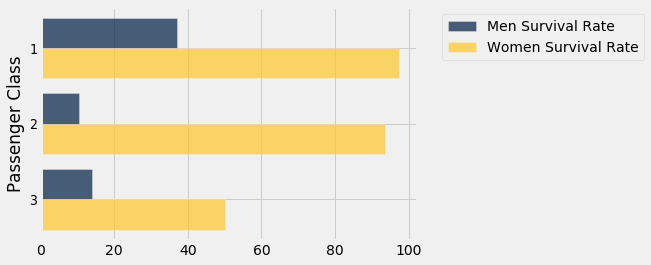

In [147]:
survival_table_by_sex = Table().with_columns(
    "Passenger Class", make_array(1, 2, 3), 
    "Men Survival Rate", make_array(first_class_men_survival_rate, second_class_men_survival_rate, third_class_men_survival_rate), 
    "Women Survival Rate", make_array(first_class_women_survival_rate, second_class_women_survival_rate, third_class_women_survival_rate))
survival_table_by_sex.barh('Passenger Class')

**Question 4.**  The variables `men_survival_rate`, `first_class_men_survival_rate`, `second_class_men_survival_rate`, and `third_class_men_survival_rate` are related by an equation of the form

$$\text{men_survival_rate} = c_1*\text{first_class_men_survival_rate}+ c_2*\text{second_class_men_survival_rate} + c_3*\text{third_class_men_survival_rate}.$$

In this equation, the variable $c_1$ represents which of these quantities? Set `c1_meaning` to either 1, 2, or 3.
1. the number of men in first class
2. the percentage of men in first class
3. the proportion of men in first class

In [148]:
c1_meaning = ...

In [149]:
c1_meaning = 3
((men.group('Pclass').column(1)/men.num_rows)*make_array(first_class_men_survival_rate, second_class_men_survival_rate, third_class_men_survival_rate)).sum()

18.241758241758241

In [150]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Part 4: Survival of Women by Marital Status

In this section, we will explore the survival rates of married women versus those of unmarried women. All survival rates should be given as percentages (between 0 and 100).

**Question 1.** Recall that each passenger's name included a title. Assuming that "Mrs." and "Mme." (Madame) denote a married woman, and "Miss." and "Mlle." (Mademoiselle) denote an unmarried women, let's try to figure out whether the marital status of women affected their chance of survival. Calculate the survival rates for married and unmarried women, saving your answers in variables `married_rate` and `unmarried_rate`. Women with ambiguous titles, such as "Lady" and "Ms.", should not be included in either group.

*Hint: The predicate `are.contained_in()` may be useful here.*

In [151]:
married_rate = ...
unmarried_rate = ...
married_rate, unmarried_rate

(Ellipsis, Ellipsis)

In [152]:
married_rate = titanic.where('Title',are.contained_in(['Mrs.', 'Mme.'])).column('Survived').mean() * 100
unmarried_rate = titanic.where('Title',are.contained_in(['Miss.', 'Mlle.'])).column('Survived').mean() * 100
married_rate, unmarried_rate


(80.808080808080803, 69.93464052287581)

In [153]:
_ = ok.grade('q4_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Now, let’s compare the survival rate of children, `child_rate`, with the survival rate of adults, `adult_rate`. An adult is defined to be someone 18 years of age or older.

In [154]:
child_rate = ...
adult_rate = ...
child_rate, adult_rate

(Ellipsis, Ellipsis)

In [155]:
child_rate = titanic.where('Age',are.below(18)).column('Survived').mean() * 100
adult_rate = titanic.where('Age',are.above_or_equal_to(18)).column('Survived').mean() * 100
child_rate, adult_rate

(46.0, 37.213114754098356)

In [156]:
_ = ok.grade('q4_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** How does your answer to Question 2 inform your interpetation of the data in Question 1? Choose the best answer (1, 2, or 3) and save it in variable `q3_answer`.
1. The answer to Question 2 is **not relevant** to my interpretation of the data in Question 1. Knowing the children and adult survival rates does not affect whether marital status was important in determining survival.
2. The answer to Question 2 makes me **more certain** that marital status was important in determining survival.
3. The answer to Question 2 makes me **less certain** that marital status was important in determining survival.

In [157]:
q3_answer = ...

In [158]:
q3_answer = 2

In [159]:
_ = ok.grade('q4_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Part 5: Baby Names

Popular names are changing all the time! In this section, we will try to find out some interesting things about names around the time of the Titanic.

You can verify yourself that the average age of passengers onboard the Titanic was about 30 years old. Here, we provide you another dataset about popular names, based on social security records for people whose birth year is 1882 (Why 1882?). More information about this dataset can be found [here.](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data) The dataset contains a list of names with a count of how many babies born in 1882 were given that name.

**Question 1.** First, load the data from the file `data/names.csv` into a Table called `names`, then determine the lengths of the shortest and longest names in the dataset.

In [160]:
names =  ...
min_length = ...
max_length = ...
min_length, max_length

(Ellipsis, Ellipsis)

In [161]:
names = Table.read_table('data/names.csv')
names

Name    | Occurrence
Aaron   | 85
Ab      | 5
Abbie   | 80
Abby    | 11
Abe     | 50
Abel    | 10
Abigail | 14
Abner   | 32
Abraham | 91
Abram   | 25
... (2002 rows omitted)

In [162]:
max_length = max(names.apply(len,"Name"))
min_length = min(names.apply(len,"Name"))
min_length, max_length

(2, 11)

In [163]:
_ = ok.grade('q5_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Generate a chart or plot that allows one to easily compare the relative popularity of the top 20 baby names of 1882. Make sure your chart or plot is clearly labeled and unambiguous.

In [164]:
# Make your visualization here.

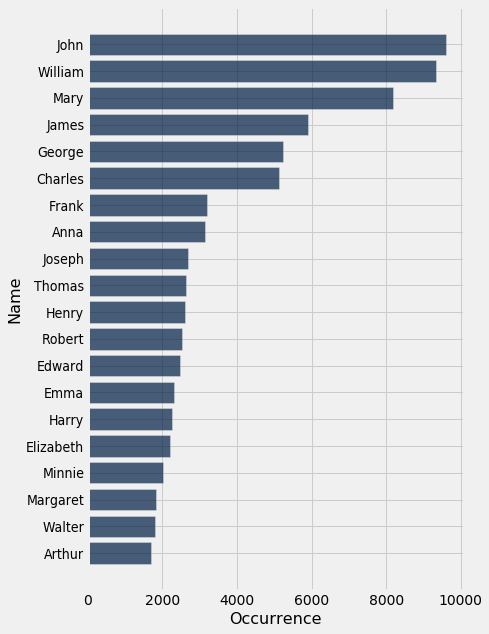

In [165]:
names.sort('Occurrence', descending=True).take(np.arange(20)).barh('Name')

**Question 3.** What proportion of babies born in 1882 had one of the top 3 most popular baby names? Remember that a proportion should be between 0 and 1.

In [166]:
proportion = ...
proportion

Ellipsis

In [167]:
proportion = names.where('Name', are.contained_in(['John', 'William', 'Mary'])).column('Occurrence').sum()\
/names.column('Occurrence').sum()
proportion

0.1223474606492035

In [168]:
_ = ok.grade('q5_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Of the first names of passengers on board the Titanic, which name was most popular according to the names dataset in 1882? How many Titanic passengers have that name? Save your answers to these two questions as `most_popular_name` and `most_popular_name_count`, respectively. 

In [169]:
most_popular_name = ...
most_popular_name

Ellipsis

In [170]:
most_popular_name_count = ...
most_popular_name_count

Ellipsis

In [171]:
joined = titanic.join("First Name",names,"Name")
most_popular_name = joined.sort('Occurrence', descending="True").column('First Name').item(0)
most_popular_name

'John'

In [172]:
most_popular_name_count = joined.where('First Name', most_popular_name).num_rows
most_popular_name_count

20

In [173]:
_ = ok.grade('q5_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Surprisingly, the most common name among the Titanic passengers was not the most popular name of the time. Determine the most common name among the Titanic passengers, and save it as `most_common_name`. Determine how many passengers had that name and save it as `most_common_name_count.`

In [174]:
most_common_name = ...
most_common_name

Ellipsis

In [175]:
most_common_name_count = ...
most_common_name_count

Ellipsis

In [176]:
most_common_name = titanic.group('First Name').sort('count', descending=True).column('First Name').item(0)
most_common_name

'William'

In [177]:
most_common_name_count = titanic.where('First Name', most_common_name).num_rows
most_common_name_count

26

In [178]:
_ = ok.grade('q5_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Of the first names of passengers on board the Titanic, which names were least popular according to the names dataset in 1882? In this case, there are multiple names that are tied for least popular. For any one of these tied least popular names, how many Titanic passengers have that name?
(the answer should be the same for each of the tied names). Save your answers to these two questions as `least_popular_names`, which should be an array, and `least_popular_name_count`, which should be an integer.

In [179]:
least_popular_names = ...
least_popular_names

Ellipsis

In [180]:
least_popular_name_count = ...
least_popular_name_count

Ellipsis

In [181]:
joined = titanic.join("First Name",names,"Name")
min_occurrences = joined.column('Occurrence').min()
least_popular_names = joined.where('Occurrence', min_occurrences).column('First Name')
least_popular_names

array(['Adolf', 'Lionel'], 
      dtype='<U10')

In [182]:
least_popular_name_count = joined.where('First Name', least_popular_names.item(0)).num_rows
least_popular_name_count

1

In [183]:
_ = ok.grade('q5_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7. (Extra Credit)** Interestingly, there are some first names that both males and females used during that time! Create an array called `names_for_both` that contains all first names that were used by male and female Titanic passengers.

In [184]:
names_for_both = ...
names_for_both

Ellipsis

In [185]:
names_for_both = titanic.select('First Name', 'Sex').group(['First Name', 'Sex']).\
drop('count').group('First Name').where('count', 2).column('First Name')
names_for_both

array(['Jean'], 
      dtype='<U12')

In [186]:
_ = ok.grade('q5_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# Congratulations! You finished the project!

## To submit:

1. Select `Run All` from the `Cell` menu to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine.
3. Submit using the cell below.
4. Save PDF and submit to Gradescope.
5. Add your partner (if applicable) on both OKPY and Gradescope.

In [187]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

In [188]:
#_ = ok.submit()

## Don't forget to submit your PDF to Gradescope!